# Fraud detection
- Explore the dataset/visualize
- Decide which features are important
- Perform Machine Learning
- Test the model on testing set

In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import pandas as pd
import seaborn as sns
% matplotlib inline
sns.set(style="darkgrid")
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True); df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40061.0,-6.174088,-5.205599,-1.270170,1.363864,0.256893,-1.786244,-2.721636,-2.195284,-0.997955,...,-1.286068,0.556405,-1.024726,0.514721,-1.468390,-0.378477,0.547615,-1.580860,29.90,0
1,76846.0,1.228415,-0.280477,1.127201,0.259348,-1.206710,-0.524658,-0.700823,0.033725,0.947035,...,0.066843,0.344682,-0.023627,0.465014,0.205751,1.110233,-0.036665,0.014204,5.00,0
2,162564.0,-0.675906,-0.251673,1.158191,-3.145172,-0.090197,-0.351025,0.116108,-0.070878,-2.319747,...,-0.215279,-0.192075,-0.344639,0.469449,0.875594,-0.124052,0.249803,0.114429,30.00,0
3,48233.0,1.203579,0.169705,0.609475,0.557639,-0.567296,-0.797484,-0.071974,-0.042464,-0.151273,...,-0.198480,-0.635870,0.155867,0.516346,0.142980,0.066230,-0.035851,0.009729,1.29,0
4,62687.0,-0.059341,-0.383834,1.360854,-2.338312,-1.115682,-1.120529,-0.296238,-0.072972,-1.995626,...,-0.111472,-0.051810,-0.007722,0.306927,-0.593180,-0.438238,0.159019,0.161953,0.67,0


In [3]:
# Partioning the fraudulent cases and non fraud causes
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


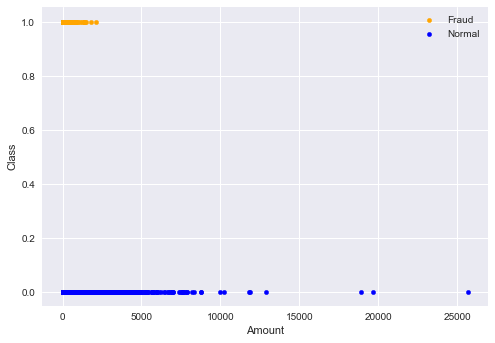

In [4]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
# ax; the same plot 
ax2 = non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

### Time for Machine Learning

In [5]:
x = df.iloc[:, :-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [6]:
# C is penalinizing and ensure the training set doesnt get overfitted
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))

/Users/mo/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9991172015288464


In [7]:
# Most of it is not fraud..
y_predict = np.array(logistic.predict(X_test))
print(y_predict)

[0 0 0 ... 0 0 0]


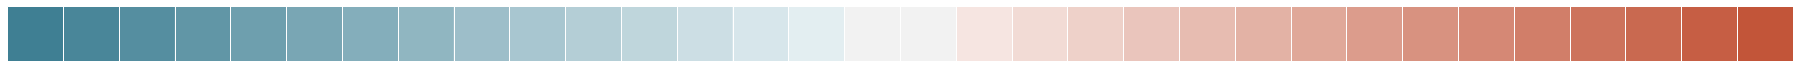

In [8]:
c32=sns.palplot(sns.diverging_palette(220, 20, n=32))

In [9]:
#sns.distplot(df[df['Class'] == 1],color='rgbcgycyrgbcgycyrgbcgycyrgbcgyc',label='Fraud')
#sns.distplot(df[df['Class'] == 1],color='r',label='fraud', ax=ax)
#sns.distplot(df[df['Class'] == 0],color='red',label='non_frauds')
#plt.title('Fraud detection')
#plt.legend(loc='upper right')
#plt.xlabel('amount')
#plt.ylabel('Class')

In [10]:
#import seaborn as sns
#sns.regplot(x=fraud, y=non_frauds, data=df, logistic=True)

In [11]:
# fraud.plot.scatter(fraud, non_frauds)

In [12]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1963,75581.0,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,...,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,124.53,1
2180,129808.0,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,276.17,1
3537,155548.0,1.878230,1.325630,-2.333469,4.233151,1.355184,-0.853508,0.716025,-0.164910,-1.502345,...,-0.152131,-0.360736,0.043414,-0.242380,0.171098,-0.002601,-0.026667,0.005238,7.06,1
3627,146022.0,0.908637,2.849024,-5.647343,6.009415,0.216656,-2.397014,-1.819308,0.338527,-2.819883,...,0.407260,-0.397435,-0.080006,-0.168597,0.465058,0.210510,0.648705,0.360224,1.18,1
4812,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1


In [13]:
data = pd.read_csv('creditcard.csv')

In [14]:
'''sns.distplot(df[df['Class'] == 1],color='green',label='Fraud')
#sns.distplot(df[df['Class'] == 1],color='green',label='Fraud', ax=ax)
sns.distplot(df[df['Class'] == 0],color='red',label='non_frauds')
plt.title('Fraud detection')
#plt.legend(loc='upper right')
plt.xlabel('amount')
plt.ylabel('Class')'''

"sns.distplot(df[df['Class'] == 1],color='green',label='Fraud')\n#sns.distplot(df[df['Class'] == 1],color='green',label='Fraud', ax=ax)\nsns.distplot(df[df['Class'] == 0],color='red',label='non_frauds')\nplt.title('Fraud detection')\n#plt.legend(loc='upper right')\nplt.xlabel('amount')\nplt.ylabel('Class')"

In [15]:
#sns.distplot(df[df['Class'] == 1])
# Show the contents
print(df)

            Time        V1        V2        V3        V4        V5        V6  \
0        40061.0 -6.174088 -5.205599 -1.270170  1.363864  0.256893 -1.786244   
1        76846.0  1.228415 -0.280477  1.127201  0.259348 -1.206710 -0.524658   
2       162564.0 -0.675906 -0.251673  1.158191 -3.145172 -0.090197 -0.351025   
3        48233.0  1.203579  0.169705  0.609475  0.557639 -0.567296 -0.797484   
4        62687.0 -0.059341 -0.383834  1.360854 -2.338312 -1.115682 -1.120529   
5       139608.0  2.014261 -0.127412 -1.012974  0.325930 -0.169882 -0.953292   
6       163738.0 -2.422593 -0.771634  0.597683 -2.618355 -1.524547 -0.920950   
7       136854.0  2.133209 -0.997739 -1.287737 -1.021192 -0.333712 -0.143484   
8        71647.0  1.045776 -0.361860  0.483747  0.979481 -0.824263 -0.599268   
9        47261.0  1.226150  0.576148 -1.256135  1.458940  2.544664  3.541349   
10       45702.0 -1.903475  1.037342  0.172192 -0.450026 -2.048079  2.329478   
11       50772.0  1.088599 -0.126475  1.

In [16]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]

The variables have a wide range of values (like the Amount variable). In order to get all variables in an equivalent range, we subtract the mean and divide by the standard deviation such that the distribution of the values is normalized:

In [17]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by 
    subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [18]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

/Users/mo/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/mo/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mo/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.88      0.61      0.72       246

   micro avg       1.00      1.00      1.00    142404
   macro avg       0.94      0.81      0.86    142404
weighted avg       1.00      1.00      1.00    142404



Great result! The 0 classes (transactions without fraud) are predicted with 100% precision and recall. It has some issues with detecting the 1 classes (transactions which are fraudulent). It can predict fraud with 88% precision. This means that 12% of the transactions which are fraudulent remain undetected by the system. But, 88% is still quite good!

In [19]:
#plt.plot(fraud , non_frauds, label='linear')
#fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
corr_matrix = df.corr()

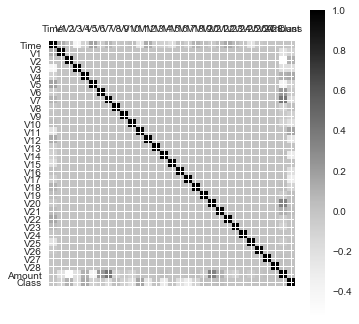

In [20]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


#df = pd.read_csv('../input/creditcard.csv')
df.head()

/Users/mo/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


ModuleNotFoundError: No module named 'imblearn'

Text(0,0.5,'Frequency')

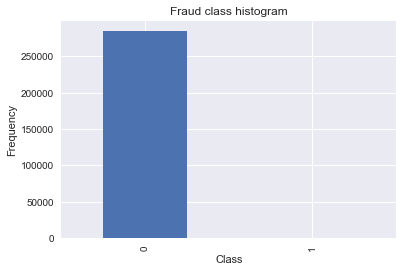

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [23]:
from sklearn.preprocessing import StandardScaler
# Y.values.reshape(-1,1)
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

/Users/mo/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [24]:
#Select only the anonymized features.
v_features = df.ix[:,1:29].columns

/Users/mo/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


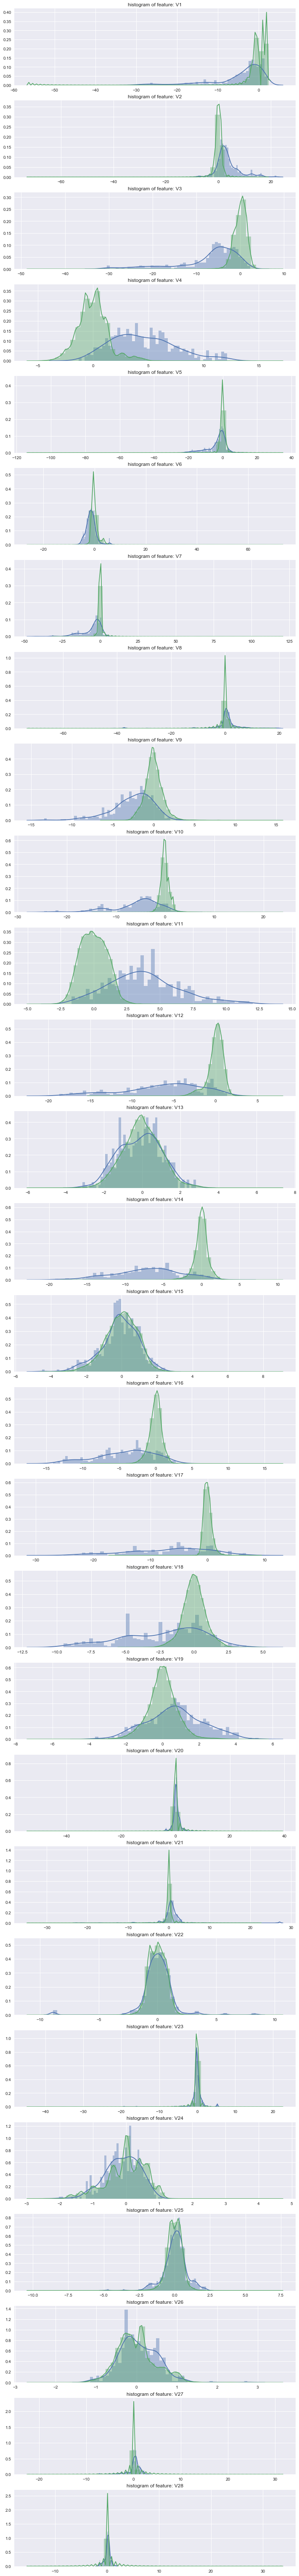

In [26]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show() 

In [27]:
#Drop all of the features that have very similar distributions between the two types of transactions.
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [28]:
# create new fearures for distribution
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [29]:
#Rename 'Class' to 'Fraud'.
df = df.rename(columns={'Class': 'Fraud'})

In [30]:
#create Fraud and normal feature distribution
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [31]:
# create X_train by taking 80% of fraud transactions and 80% of normal transactions
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)
X_test = df.loc[~df.index.isin(X_train.index)]

In [32]:
# create Y_train by taking 80% of fraud transactions and 80% of normal transactions
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)
y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [33]:
# drop the guest features
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [34]:
# scale values of features
features = X_train.columns.values
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std


### Train the graph

In [35]:
#split the dataset for train,test & validation
split = int(len(y_test)/2)

inputX = X_train.as_matrix()
inputY = y_train.as_matrix()
inputX_valid = X_test.as_matrix()[:split]
inputY_valid = y_test.as_matrix()[:split]
inputX_test = X_test.as_matrix()[split:]
inputY_test = y_test.as_matrix()[split:]

In [36]:
#parameters
learning_rate = 0.005
training_epoch = 10
batch_size = 2048
display_step = 1

In [37]:
#tf graph input
x = tf.placeholder(tf.float32,[None,19])
y = tf.placeholder(tf.float32,[None,2])

In [38]:
#set model weights
w = tf.Variable(tf.zeros([19,2]))
b = tf.Variable(tf.zeros([2]))

Instructions for updating:
Colocations handled automatically by placer.


In [39]:
#construct model using softmax activation
pred = tf.nn.softmax(tf.matmul(x,w) + b) 

In [40]:
#minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred)))

In [41]:
#Gradient descent
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [42]:
#initializing variables
init = tf.global_variables_initializer()


In [43]:
#launch the graph
with tf.Session() as sess:
    sess.run(init)
    final_output_array = []
    #training cycle
    for epoch in range(training_epoch):
        total_batch = len(inputX)/batch_size
        avg_cost = 0
        #loop over all the batches
        for batch in range(int(total_batch)):
            batch_xs = inputX[(batch)*batch_size:(batch+1) *batch_size]
            batch_ys = inputY[(batch)*batch_size:(batch+1) *batch_size]

            # run optimizer and cost operation
            _,c= sess.run([optimizer,cost],feed_dict={x:batch_xs,y:batch_ys})
            avg_cost += c/total_batch

        correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

        #disply log per epoch step
        if (epoch+1) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX_test,y: inputY_test})
            print ("epoch:",epoch+1,"train_accuracy",train_accuracy,"cost",newCost,"valid_accuracy",sess.run([accuracy],feed_dict={x:inputX_valid,y:inputY_valid}))
            print ("")

    print ('optimization finished.')


epoch: 1 train_accuracy 0.99950844 cost 8908.428 valid_accuracy [0.99936795]

epoch: 2 train_accuracy 0.99950844 cost 4767.879 valid_accuracy [0.99936795]

epoch: 3 train_accuracy 0.99954355 cost 2959.109 valid_accuracy [0.99936795]

epoch: 4 train_accuracy 0.99954355 cost 2029.4211 valid_accuracy [0.99936795]

epoch: 5 train_accuracy 0.999368 cost 1491.9055 valid_accuracy [0.99926263]

epoch: 6 train_accuracy 0.999368 cost 1152.4453 valid_accuracy [0.99926263]

epoch: 7 train_accuracy 0.9992978 cost 923.48987 valid_accuracy [0.99926263]

epoch: 8 train_accuracy 0.9992978 cost 761.14087 valid_accuracy [0.99926263]

epoch: 9 train_accuracy 0.9992978 cost 641.4543 valid_accuracy [0.99929774]

epoch: 10 train_accuracy 0.9992627 cost 550.4077 valid_accuracy [0.99929774]

optimization finished.
